In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if img_path.endswith(('.png', '.jpg', '.jpeg')):
            image = Image.open(img_path)

            image = cv2.imread(img_path)
            images.append(image)






    return np.array(images)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset_folder = '/content/drive/MyDrive/training_seg2/new_original_output'
dataset_folder2 = '/content/drive/MyDrive/training_seg2/new_original_output2'
mask_folder='/content/drive/MyDrive/training_seg2/new_output'
mask_folder2='/content/drive/MyDrive/training_seg2/new_output2'
test_folder= '/content/drive/MyDrive/1_20'
dataset_folder3='/content/drive/MyDrive/validations_seg2/new_original'
mask_folder3='/content/drive/MyDrive/validations_seg2/new_mask'
test_dataset_folder=''
target_pixels = 30000
darkness_threshold = 120
dataset_new_folder='/content/drive/MyDrive/X'
new_mask_folder='/content/drive/MyDrive/y'
# Load images and labels
X= load_images_from_folder(dataset_new_folder)
y= load_images_from_folder(new_mask_folder)
"""
X2= load_images_from_folder(dataset_folder2)
y2= load_images_from_folder(mask_folder2)

X3= load_images_from_folder(dataset_folder3)
y3=load_images_from_folder(mask_folder3)
"""
test_dataset= load_images_from_folder(test_folder)
# Print shape of the data (optional)
print("Shape of X (pixel values):", X.shape)
print("Shape of y (labels):", y.shape)
print("Shape of y (labels):", test_dataset.shape)

Shape of X (pixel values): (813, 100, 100, 3)
Shape of y (labels): (813, 100, 100, 3)
Shape of y (labels): (32, 100, 100, 3)


In [ ]:
X = np.concatenate((X,X2),axis=0)
X= np.concatenate((X,X3),axis=0)
y= np.concatenate((y,y2),axis=0)
y= np.concatenate((y,y3),axis=0)

In [ ]:
def convert_to_binary_mask(image_dataset):
    binary_masks = []
    color_enumeration = [
        (0, 255, 0),   # Green
        (255, 255, 0), # Cyan
        (255, 0, 255), # Magenta
        (0, 255, 255), # Yellow
        (0, 0, 255),   # Red
        (255, 0, 0),   # Blue
        (255, 255, 255)  # White
    ]
    for image in image_dataset:
        img = Image.fromarray(image.astype('uint8'))
        img_rgb = img.convert('RGB')
        width, height = img.size
        binary_mask = np.zeros((height, width, 1), dtype=np.uint8)  # Change shape here
        for y in range(height):
            for x in range(width):
                r, g, b = img_rgb.getpixel((x, y))
                for index, color in enumerate(color_enumeration):
                    if (r, g, b) == color:  # Check if pixel color is in the enumeration
                        binary_mask[y, x, 0] = index + 1  # Assign index + 1 as the value
                        break
        binary_masks.append(binary_mask)
    binary_masks=np.array(binary_masks)
    #binary_masks = np.expand_dims(binary_masks, axis=3)
    binary_masks_one_hot = to_categorical(binary_masks, num_classes=len(color_enumeration) + 1)
    #binary_masks_one_hot = np.expand_dims(binary_masks_one_hot, axis=3)
    # Squeeze the extra dimension to make it (813, 100, 100, 1)
    #binary_masks_one_hot = np.squeeze(binary_masks_one_hot, axis=4)
    return binary_masks_one_hot

In [ ]:
def visualize_masks(binary_masks):
    num_samples = binary_masks.shape[0]
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 5))
    for i in range(num_samples):
        axes[i].imshow(binary_masks[i], cmap='binary')
        axes[i].axis('off')
        axes[i].set_title(f'Mask {i+1}')
    plt.show()

In [ ]:
from keras.utils import to_categorical
binary_masks = convert_to_binary_mask(y)
print(binary_masks.shape)
print(binary_masks[0])
#validation_masks=convert_to_binary_mask(y3)

(813, 100, 100, 8)
[[[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have your data stored in X (features) and y (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, binary_masks, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def create_semantic_segmentation_model(input_shape, num_classes):
    # Define the encoder
    inputs = tf.keras.Input(shape=input_shape)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Dropout(0.25)(conv1)  # Adding dropout
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Dropout(0.25)(conv2)  # Adding dropout
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Define the decoder
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Dropout(0.25)(conv3)  # Adding dropout
    up1 = layers.UpSampling2D(size=(2, 2))(conv3)
    conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    conv4 = layers.Dropout(0.25)(conv4)  # Adding dropout
    up2 = layers.UpSampling2D(size=(2, 2))(conv4)
    conv5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
    conv5 = layers.Dropout(0.25)(conv5)  # Adding dropout

    # Output layer
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(conv5)

    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 8  # Update this with the number of classes
learning_rate = 0.00001

# Create the model
model = create_semantic_segmentation_model(input_shape, num_classes)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_42 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 dropout_35 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 50, 50, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 dropout_36 (Dropout)        (None, 50, 50, 64)        0         
                                                           

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
input_shape = (100,100, 3)
num_classes=8
# Create the model
model = create_semantic_segmentation_model(input_shape,num_classes)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
"""
X_normalized = X.astype('float32') / 255.0

X3_normalized = X3.astype('float32') / 255.0
"""
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
#model.fit(X, binary_masks, epochs=5, batch_size=32, validation_data=(X3_normalized, validation_masks), callbacks=[reduce_lr])
# Example of using the normalized data in model.fit
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
17/17 [==============================] - 74s 4s/step - loss: 2.1876 - accuracy: 0.6755 - val_loss: 0.1750 - val_accuracy: 0.9187
Epoch 2/5
17/17 [==============================] - 69s 4s/step - loss: 0.1981 - accuracy: 0.8805 - val_loss: 0.1324 - val_accuracy: 0.9187
Epoch 3/5
17/17 [==============================] - 71s 4s/step - loss: 0.1568 - accuracy: 0.9140 - val_loss: 0.1644 - val_accuracy: 0.9187
Epoch 4/5
17/17 [==============================] - 70s 4s/step - loss: 0.1438 - accuracy: 0.9170 - val_loss: 0.1471 - val_accuracy: 0.9187
Epoch 5/5
17/17 [==============================] - 71s 4s/step - loss: 0.1368 - accuracy: 0.9223 - val_loss: 0.1187 - val_accuracy: 0.9187


2/2 [==============================] - 4s 2s/step


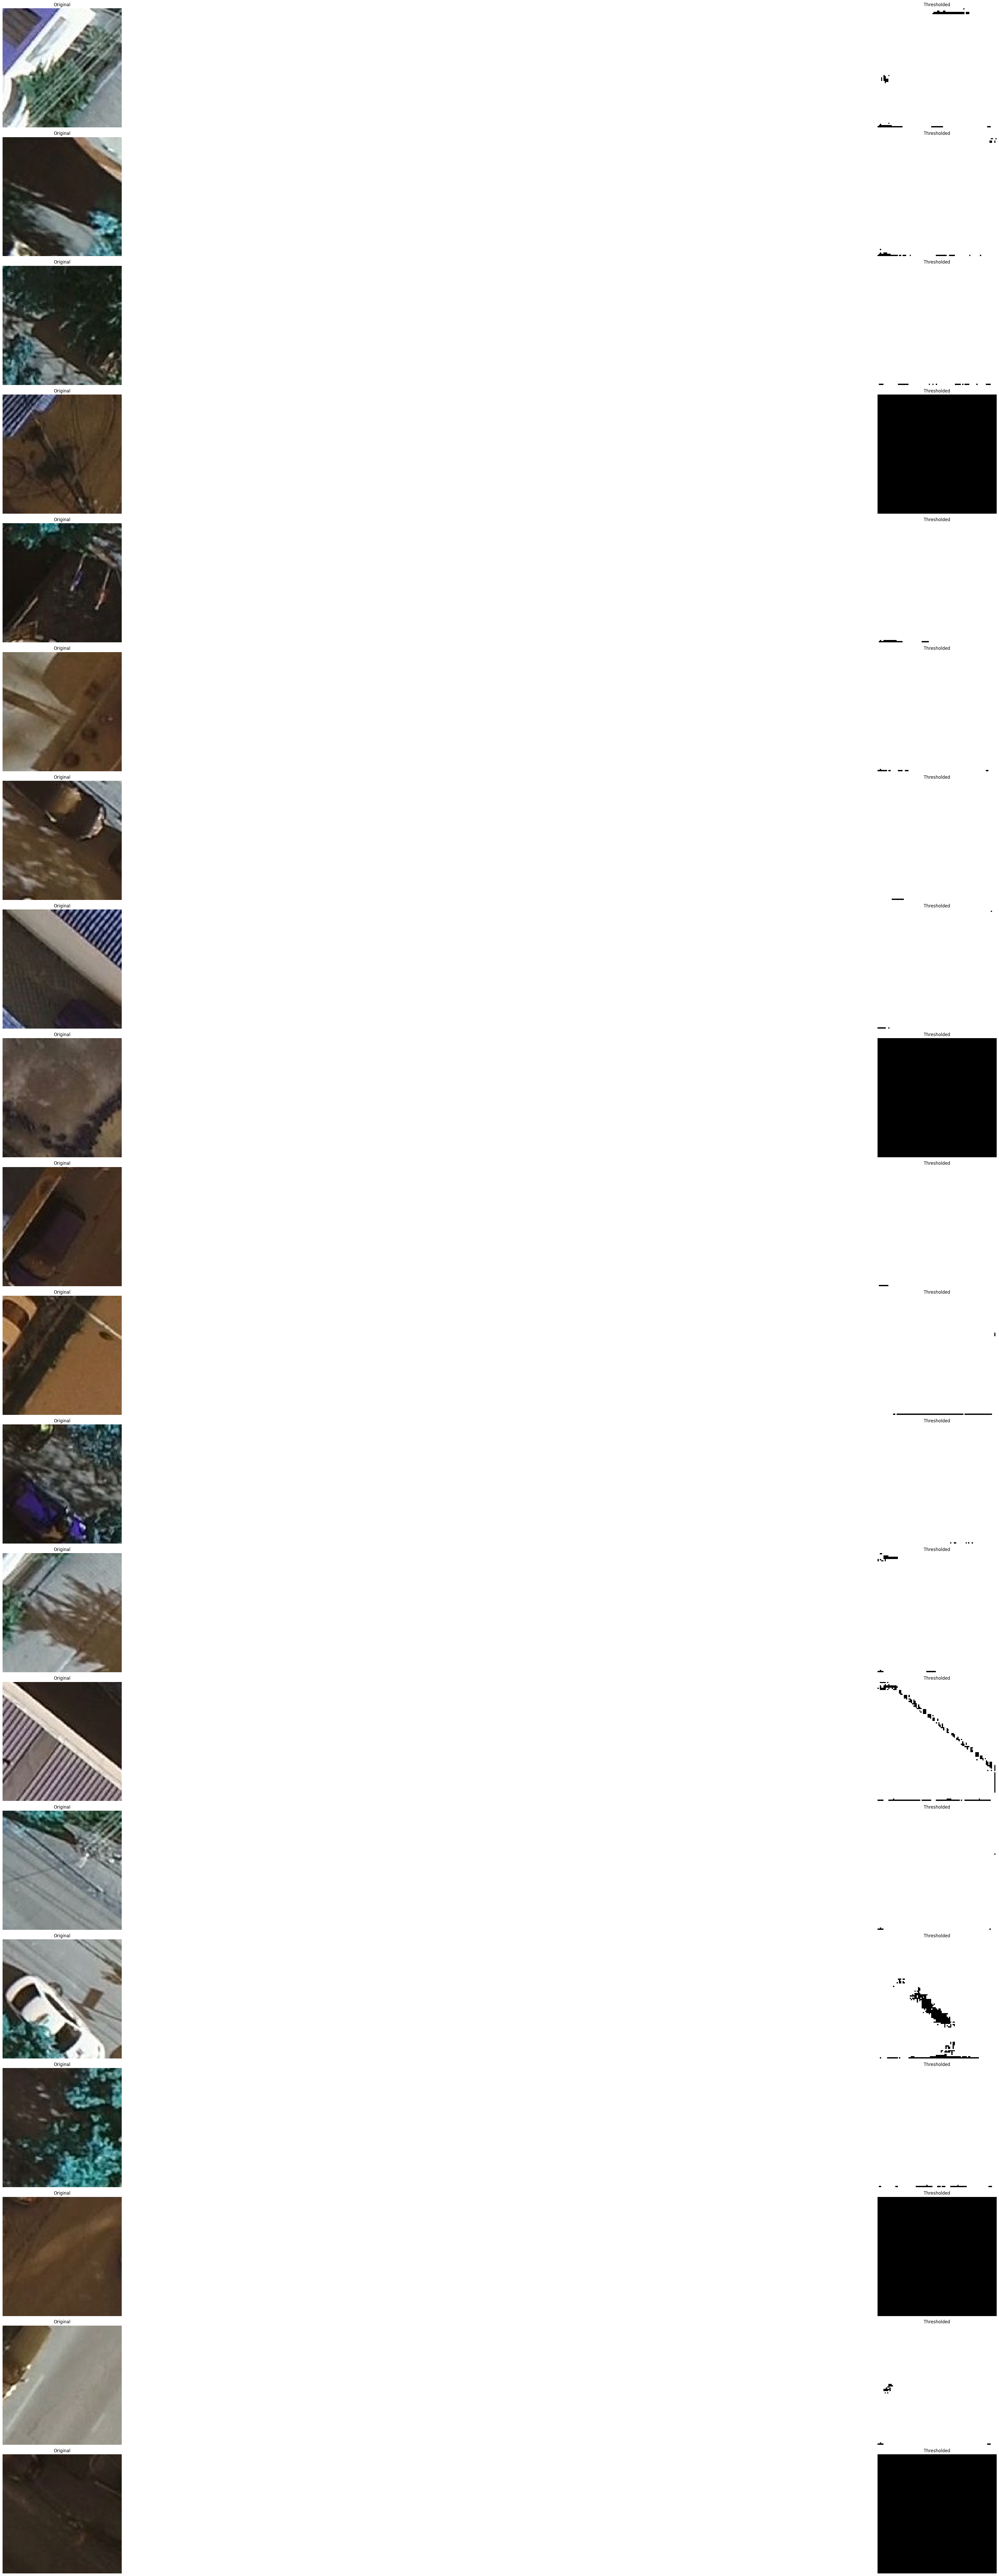

In [ ]:
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt

# Resize test images to match the model's input size
resized_test_images = []
desired_height=100
desired_width=100
for image in X_test:
    resized_image = resize(image, (desired_height, desired_width))  # Adjust desired_height and desired_width
    resized_test_images.append(resized_image)
resized_test_images = np.array(resized_test_images)

# Make predictions on resized test data
predictions = model.predict(resized_test_images)

# Assuming 'predictions' has shape (n_samples, height, width, 1)
# You may want to threshold the predictions to obtain binary masks
thresholded_predictions = ( (predictions > 0.49)).astype(np.uint8)

# Display original and thresholded images
num_images_to_show = 20  # Number of images to display
fig, axes = plt.subplots(num_images_to_show, 2, figsize=(100, 100))

for i in range(num_images_to_show):
    # Original image
    axes[i, 0].imshow(X_test[i], cmap='gray')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Thresholded image
    axes[i, 1].imshow(thresholded_predictions[i].squeeze(), cmap='gray')
    axes[i, 1].set_title('Thresholded')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()



1/1 [==============================] - 2s 2s/step


<ipython-input-122-bd835770ccf5>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


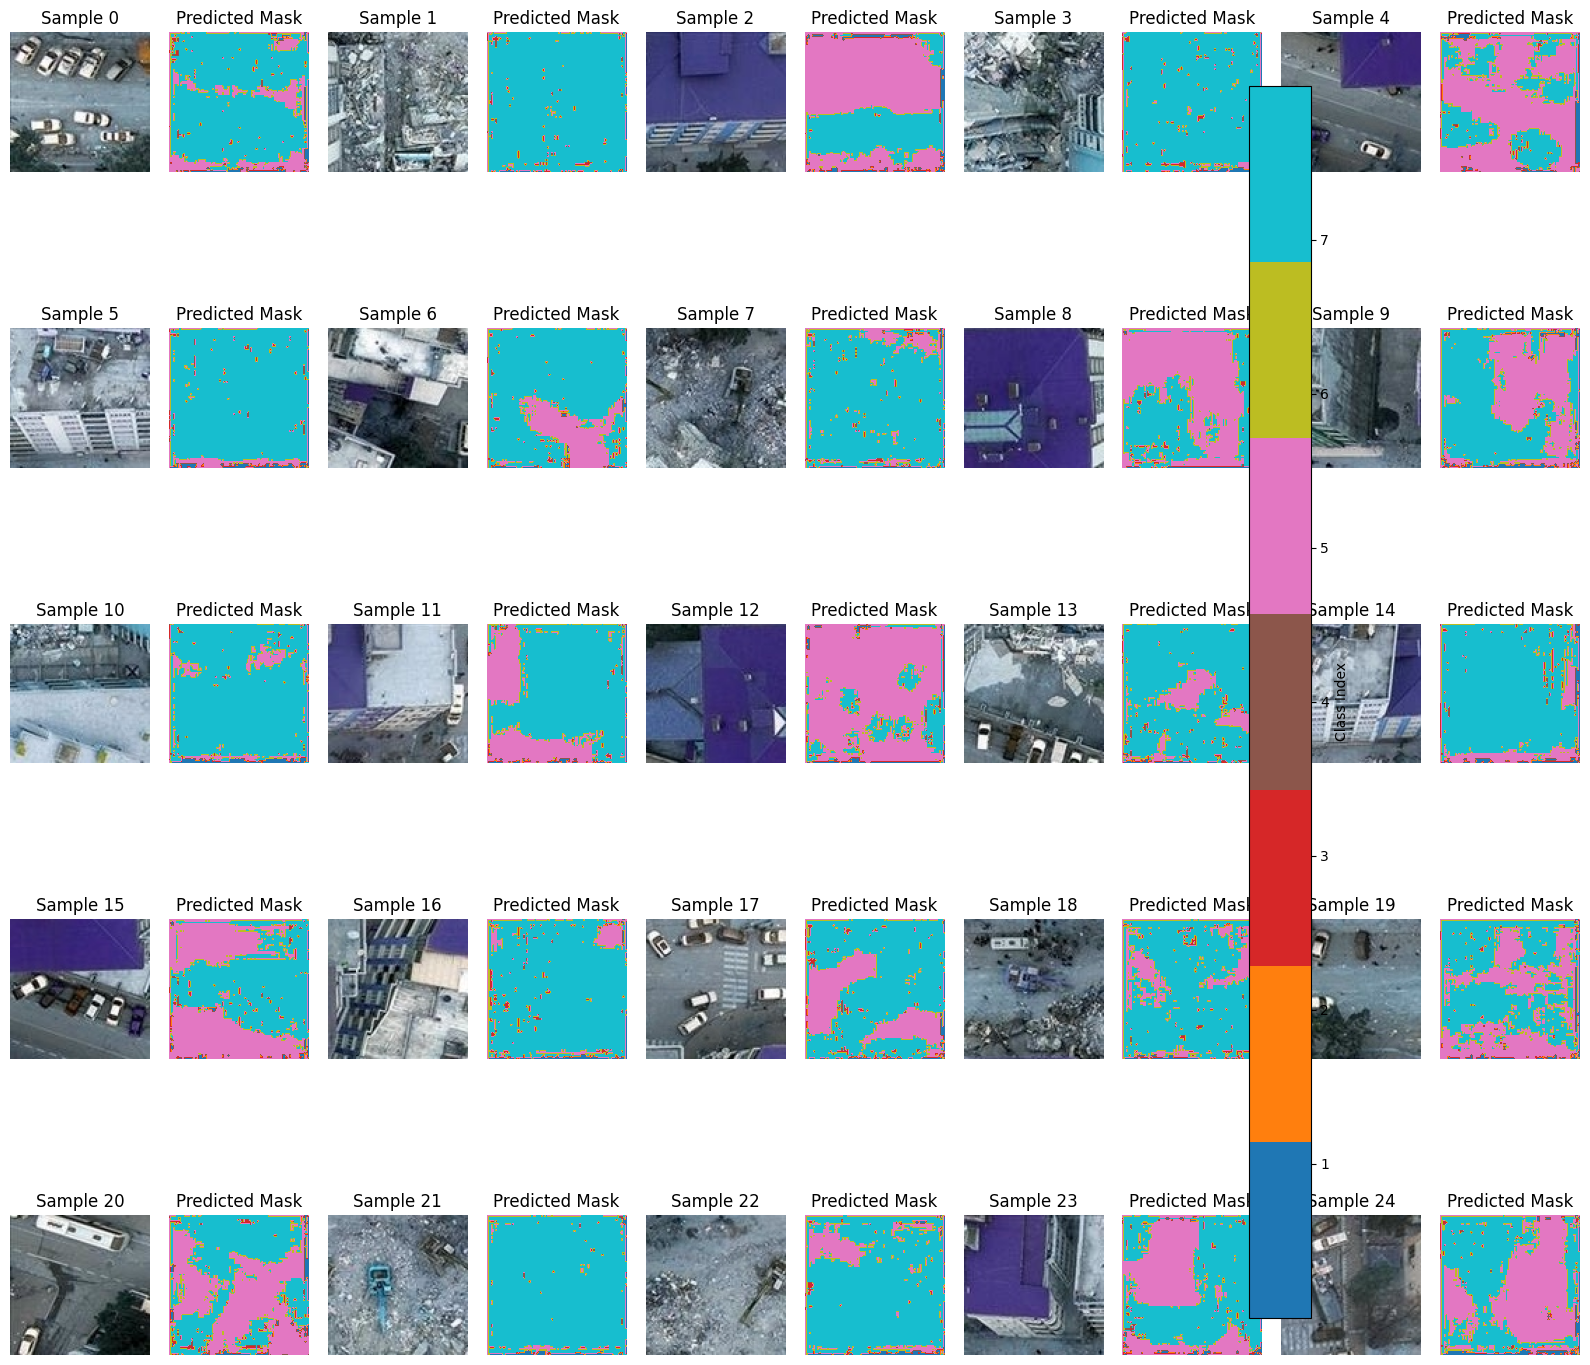

In [ ]:
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'test_images' as your test data
# Assuming 'predictions' has shape (n_samples, height, width, num_classes)

# Resize test images to match the model's input size


# Make predictions on resized test data
predictions = model.predict(test_dataset)

# Assuming 'predictions' has shape (n_samples, height, width, num_classes)
class_weights = np.array([0, 2.5, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0])  # Adjust weights as needed

# Apply weights to predictions
weighted_predictions = predictions * class_weights

# Assuming 'predictions' has shape (n_samples, height, width, num_classes)
# You may want to convert softmax probabilities to class labels, excluding background class
predicted_labels = np.argmax(weighted_predictions, axis=-1)

# Set the number of rows and columns for subplots
num_rows = 5  # Change as needed
num_cols = 5  # Change as needed

# Create subplots
fig, axes = plt.subplots(num_rows, 2*num_cols, figsize=(16, 16))

# Define a colormap with distinct colors for each class
cmap = plt.cm.get_cmap('tab10', predicted_labels.max())

# Loop through test dataset and predictions
for i in range(num_rows):
    for j in range(num_cols):
        sample_index = i * num_cols + j

        # Display the original image
        axes[i, 2*j].imshow(test_dataset[sample_index])
        axes[i, 2*j].set_title('Sample {}'.format(sample_index))
        axes[i, 2*j].axis('off')

        # Display the predicted mask, with different colors for each label
        predicted_mask = predicted_labels[sample_index]
        resized_prediction = resize(predicted_mask, test_dataset[sample_index].shape[:2], order=0, anti_aliasing=False, preserve_range=True)
        im = axes[i, 2*j+1].imshow(resized_prediction, cmap=cmap, vmin=0, vmax=predicted_labels.max()+1)
        axes[i, 2*j+1].set_title('Predicted Mask')
        axes[i, 2*j+1].axis('off')

# Add color bar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical')
cbar.set_ticks(np.arange(1, predicted_labels.max() + 1))
cbar.set_ticklabels(np.arange(1, predicted_labels.max() + 1))
cbar.set_label('Class Index')

plt.tight_layout()
plt.show()


In [ ]:
print(predicted_labels.max())

7


In [ ]:
pip install sklearn-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00


In [ ]:
from skimage.transform import resize
from sklearn_crfsuite import CRF
predictions_train = model.predict(X3)

# Assuming 'predictions' has shape (n_samples, height, width, 1)
# You may want to threshold the predictions to obtain binary masks
thresholded_predictions = ((predictions_train > 0.15) & (predictions_train < 0.25)).astype(np.uint8)
crf = CRF()

# Flatten the binary predictions and ground truth masks
flat_predictions = thresholded_predictions.reshape(thresholded_predictions.shape[0], -1)
flat_ground_truth = binary_masks.reshape(binary_masks.shape[0], -1)

# Train CRF model
crf.fit(flat_predictions, flat_ground_truth)

predictions = model.predict(test_dataset)
# Make predictions using CRF
flat_predictions = predictions.reshape(predictions.shape[0], -1)
crf_predictions = crf.predict(flat_predictions)

# Reshape the predictions back to original shape
crf_predictions_reshaped = crf_predictions.reshape(predictions.shape)

# Plot the original test images and refined segmentation masks
plt.figure(figsize=(10, 5))
for i in range(len(test_dataset)):
    plt.subplot(2, len(test_dataset), i + 1)
    plt.imshow(test_dataset[i])
    plt.axis('off')
    plt.title('Image {}'.format(i + 1))

    plt.subplot(2, len(test_dataset), len(test_dataset) + i + 1)
    plt.imshow(crf_predictions_reshaped[i].squeeze(), cmap='gray')  # Assuming predictions are single-channel
    plt.axis('off')
    plt.title('Refined Segmentation {}'.format(i + 1))

plt.tight_layout()
plt.show()

6/6 [==============================] - 9s 2s/step


TypeError: expected bytes, numpy.uint8 found

In [ ]:
import numpy as np

# Assuming predictions is your array of model predictions
#predictions = model.predict(X_normalized)

# Get the minimum and maximum values of the predictions
min_value = np.min(predictions)
max_value = np.max(predictions)

print("Minimum Prediction Value:", min_value)
print("Maximum Prediction Value:", max_value)

Minimum Prediction Value: 0.48734856
Maximum Prediction Value: 0.49348
